In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
laptop = pd.read_csv('laptop.csv')

In [5]:
laptop.head()

,Unnamed: 0,Model,Price,Rating,Generation,Core,Ram,SSD,Display,Graphics,OS,Warranty
0,0,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,"₹50,399",70.0,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8 GB DDR4 RAM,512 GB SSD,"15.6 inches, 1920 x 1080 pixels, Touch Screen",4 GB AMD Radeon RX 6500M,Windows 11 OS,1 Year Warranty
1,1,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,"₹23,990",56.0,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8 GB LPDDR4 RAM,512 GB SSD,"15.6 inches, 1920 x 1080 pixels",Intel UHD Graphics,Windows 11 OS,1 Year Warranty
2,2,Lenovo V15 G4 ‎82YU00W7IN Laptop (AMD Ryzen 3 ...,"₹26,989",55.0,7th Gen AMD Ryzen 3 7320U,"Quad Core, 8 Threads",8 GB LPDDR5 RAM,512 GB SSD,"15.6 inches, 1920 x 1080 pixels",AMD Radeon Graphics,Windows 11 OS,1 Year Warranty
3,3,Samsung Galaxy Book2 Pro 13 Laptop (12th Gen C...,"₹69,990",60.0,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",16 GB LPDDR5 RAM,512 GB SSD,"13.3 inches, 1080 x 1920 pixels",Intel Iris Xe Graphics,Windows 11 OS,1 Year Warranty
4,4,Xiaomi Redmi G Pro 2024 Gaming Laptop (14th Ge...,"₹1,02,990",78.0,14th Gen Intel Core i9 14900HX,"24 Cores (8P + 16E), 32 Threads",16 GB DDR5 RAM,1 TB SSD,"16.1 inches, 2560 x 1600 pixels",8 GB NVIDIA GeForce RTX 4060,Windows 11 OS,1 Year Warranty


In [6]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  920 non-null    int64  
 1   Model       920 non-null    object 
 2   Price       920 non-null    object 
 3   Rating      768 non-null    float64
 4   Generation  920 non-null    object 
 5   Core        920 non-null    object 
 6   Ram         920 non-null    object 
 7   SSD         920 non-null    object 
 8   Display     919 non-null    object 
 9   Graphics    920 non-null    object 
 10  OS          919 non-null    object 
 11  Warranty    915 non-null    object 
dtypes: float64(1), int64(1), object(10)
memory usage: 86.4+ KB


In [7]:
# Convert to string (if not already), remove ₹ and commas, then convert to float
laptop['Price'] = (
    laptop['Price']
    .astype(str)  # Ensure it's treated as a string
    .str.replace('[₹,]', '', regex=True)  # Remove ₹ and commas
    .astype(float)  # Convert to float
)

In [8]:
# Extract digits from RAM (e.g., "8GB" → "8"), then convert to float
laptop['Ram'] = (
    laptop['Ram']
    .astype(str)  # Ensure it's treated as a string
    .str.extract('(\d+)')  # Extract numbers
    .astype(float)  # Convert to float
)

In [9]:
# Extract digits from SSD 
laptop['SSD'] = (
    laptop['SSD']
    .astype(str)  # Ensure it's treated as a string
    .str.extract('(\d+)')  # Extract numbers
    .astype(float)  # Convert to float
)

In [10]:
print(laptop[['Price', 'Ram', 'SSD']].head()) 
print("\nData Types:")
print(laptop[['Price', 'Ram', 'SSD']].dtypes)  # Verify dtypes

      Price   Ram    SSD
0   50399.0   8.0  512.0
1   23990.0   8.0  512.0
2   26989.0   8.0  512.0
3   69990.0  16.0  512.0
4  102990.0  16.0    1.0

Data Types:
Price    float64
Ram      float64
SSD      float64
dtype: object


In [11]:
laptop.describe()

,Unnamed: 0,Price,Rating,Ram,SSD
count,920.000000,920.000000,768.000000,920.000000,919.000000
mean,459.500000,85053.120652,61.756510,16.126087,357.369967
std,265.725422,69720.373514,7.114217,29.370312,227.425801
min,0.000000,8000.000000,50.000000,1.000000,1.000000
25%,229.750000,45417.500000,56.000000,8.000000,2.000000
50%,459.500000,64990.000000,61.500000,16.000000,512.000000
75%,689.250000,96772.500000,66.000000,16.000000,512.000000
max,919.000000,599990.000000,79.000000,512.000000,512.000000


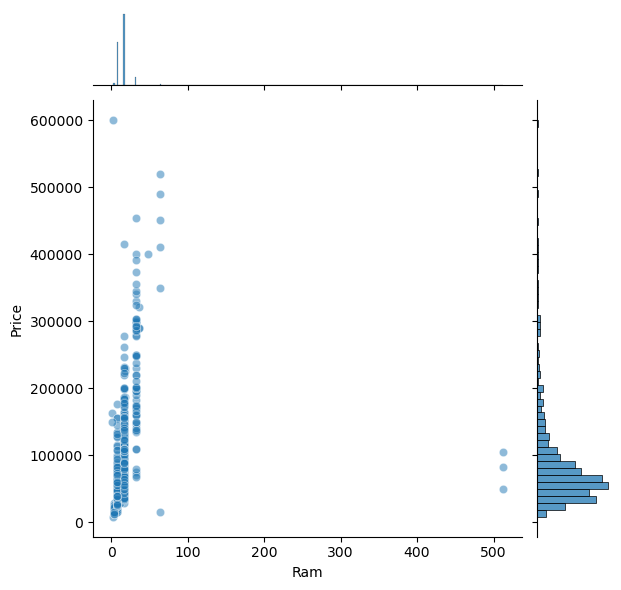

In [12]:
sns.jointplot(x='Ram', y='Price', data=laptop, alpha=0.5)

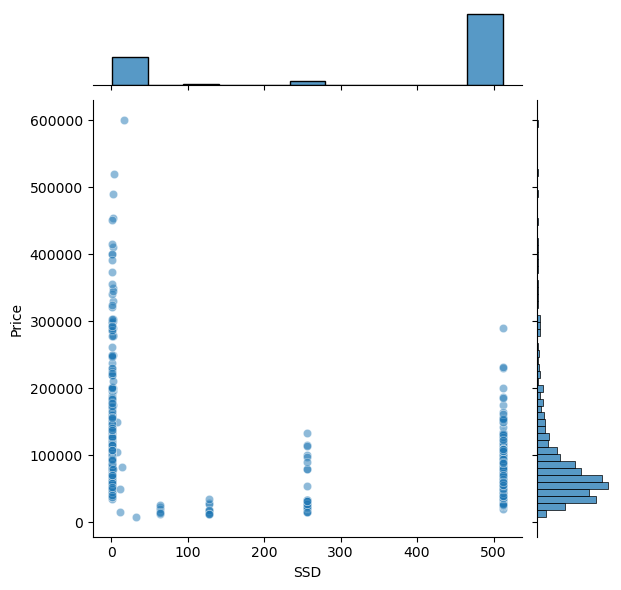

In [13]:
sns.jointplot(x='SSD', y='Price', data=laptop, alpha=0.5)

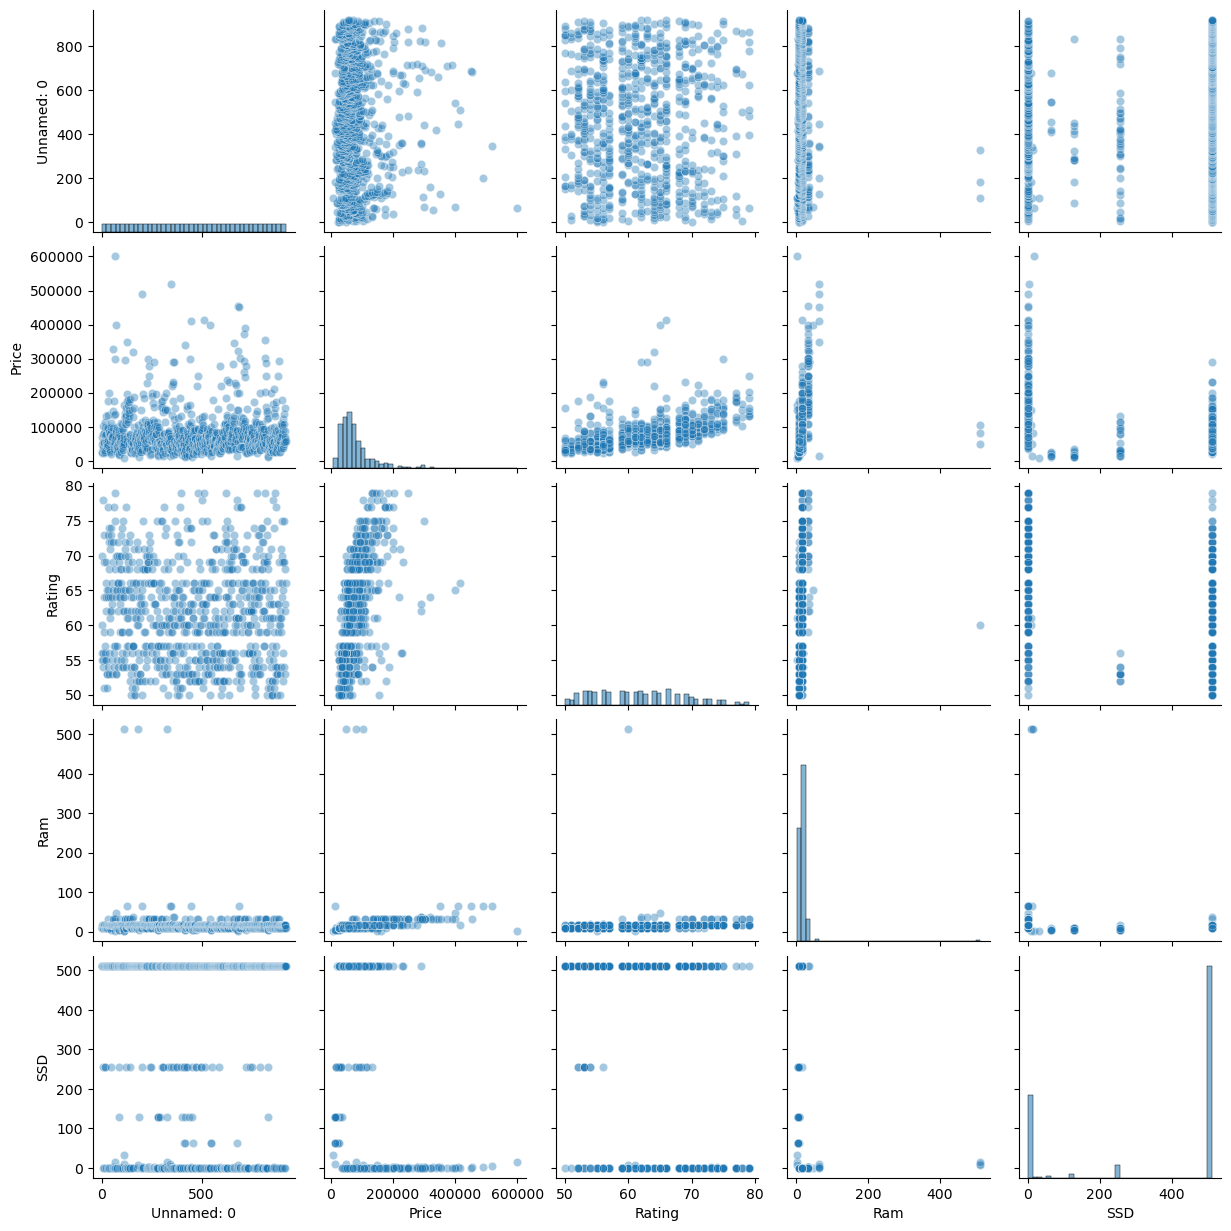

In [14]:
sns.pairplot(laptop, 
             kind='scatter', 
             plot_kws={'alpha':0.4}, 
             diag_kws={'alpha':0.55, 'bins':40})

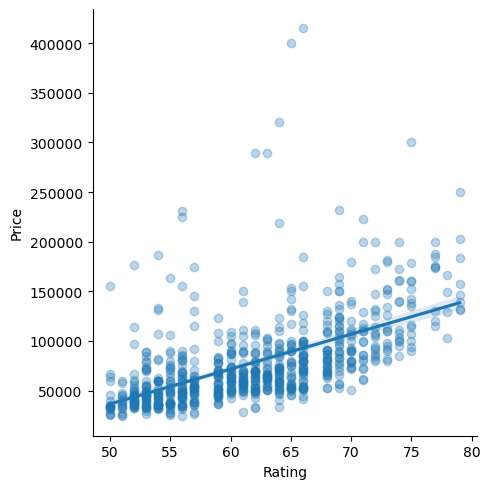

In [15]:
sns.lmplot(x='Rating', 
           y='Price', 
           data=laptop,
           scatter_kws={'alpha':0.3})

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  920 non-null    int64  
 1   Model       920 non-null    object 
 2   Price       920 non-null    float64
 3   Rating      768 non-null    float64
 4   Generation  920 non-null    object 
 5   Core        920 non-null    object 
 6   Ram         920 non-null    float64
 7   SSD         919 non-null    float64
 8   Display     919 non-null    object 
 9   Graphics    920 non-null    object 
 10  OS          919 non-null    object 
 11  Warranty    915 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 86.4+ KB


In [19]:
X = laptop[['Rating', 'Ram', 'SSD']]
y = laptop['Price']

In [20]:
X.head()
y.head()

0     50399.0
1     23990.0
2     26989.0
3     69990.0
4    102990.0
Name: Price, dtype: float64

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lm = LinearRegression()

In [25]:
from sklearn.impute import SimpleImputer

In [26]:
X_train_clean = X_train.dropna()
y_train_clean = y_train[X_train_clean.index]

In [27]:
imputer = SimpleImputer(strategy="mean")
X_train_imputed = imputer.fit_transform(X_train)

In [28]:
lm.fit(X_train_imputed, y_train)

LinearRegression()

In [29]:
lm.coef_

array([1800.02133925,  531.58672477, -112.78550111])

In [31]:
from sklearn.pipeline import make_pipeline

In [32]:
imputer = SimpleImputer(strategy='mean')  # or 'median'
model = make_pipeline(imputer, LinearRegression())

In [33]:
model.fit(X, y)


Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('linearregression', LinearRegression())])

In [34]:
score = model.score(X, y)
print(f"Model R² score: {score:.2f}")

Model R² score: 0.28


In [36]:
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['Coef'])
print(cdf)

               Coef
Rating  1800.021339
Ram      531.586725
SSD     -112.785501


In [38]:
import statsmodels.api as sm 

In [41]:
import numpy as np

In [42]:
# 1. Check for and remove infinite values
X_train = X_train.replace([np.inf, -np.inf], np.nan)

# 2. Check for missing values
print("Missing values in X_train:", X_train.isna().sum().sum())
print("Missing values in y_train:", y_train.isna().sum())

Missing values in X_train: 110
Missing values in y_train: 0


In [43]:
# 3. Handle missing values (either drop or impute)
# Option A: Drop rows with any missing values
X_train = X_train.dropna()
y_train = y_train[X_train.index]  # Keep corresponding y values

In [44]:
X = sm.add_constant(X_train)  # Adds intercept term
model = sm.OLS(y_train, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     102.5
Date:                Sun, 20 Jul 2025   Prob (F-statistic):           2.49e-52
Time:                        23:32:50   Log-Likelihood:                -6290.8
No. Observations:                 534   AIC:                         1.259e+04
Df Residuals:                     530   BIC:                         1.261e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.774e+04   1.41e+04     -5.529      0.0

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
print("Missing values in X_train:", X_train.isna().sum().sum())
print("Missing values in X_test:", X_test.isna().sum().sum())

Missing values in X_train: 0
Missing values in X_test: 43


In [48]:
print("Infinite values in X_train:", np.isinf(X_train.values).sum())
print("Infinite values in X_test:", np.isinf(X_test.values).sum())

Infinite values in X_train: 0
Infinite values in X_test: 0


In [49]:
X_test_clean = X_test.dropna()
y_test_clean = y_test[X_test_clean.index] if hasattr(y_test, 'index') else None

In [50]:
lm.fit(X_train_clean, y_train_clean)

LinearRegression()

In [54]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

# Create pipeline that automatically handles missing values
pipeline = make_pipeline(
    SimpleImputer(strategy='mean'),  # First impute missing values
    LinearRegression()               # Then fit regression
)

# Fit pipeline
pipeline.fit(X_train, y_train)

# Predict (automatically handles missing values in test data)
predictions = pipeline.predict(X_test)

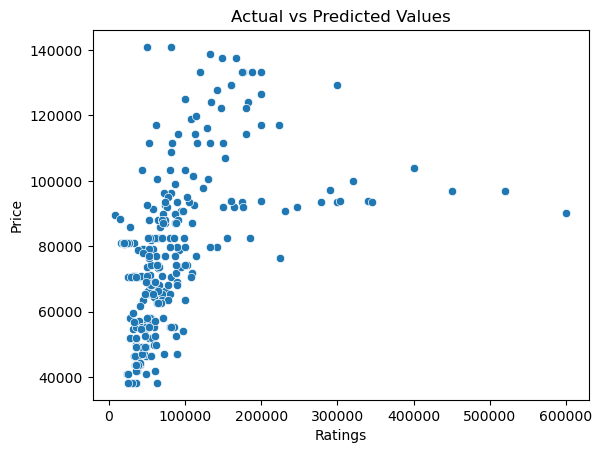

In [57]:
sns.scatterplot(x=y_test, y=predictions)
plt.xlabel('Ratings')
plt.ylabel('Price')
plt.title('Actual vs Predicted Values')
plt.show()

In [58]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [59]:
print('Mean Absolute Error:',mean_absolute_error(y_test, predictions))
print('Mean Squared Error:',mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:',math.sqrt(mean_squared_error(y_test, predictions)))

Mean Absolute Error: 35807.642048519156
Mean Squared Error: 4869331603.574994
Root Mean Squared Error: 69780.59618242735


C:\Users\ellaj\AppData\Local\Temp\ipykernel_17468\339810671.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, bins=30)


<Axes: xlabel='Price', ylabel='Density'>

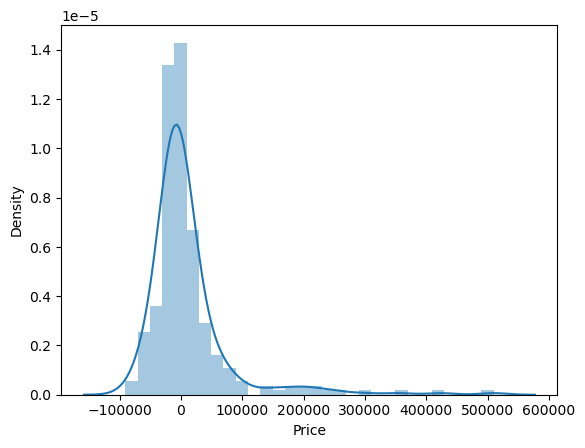

In [60]:
residuals = y_test-predictions
sns.distplot(residuals, bins=30)

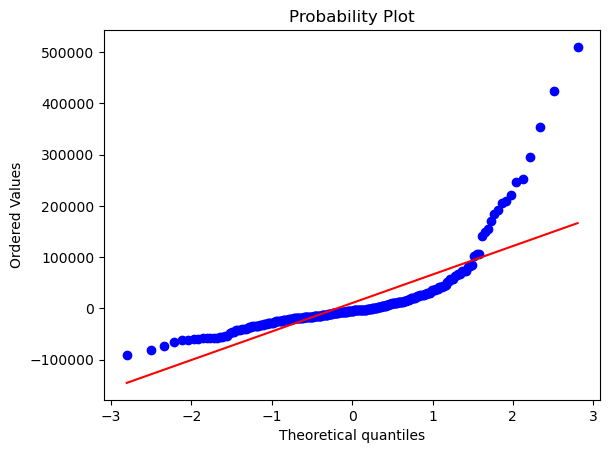

In [61]:
import pylab 
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()